<a href="https://colab.research.google.com/github/maya-papaya/ads1-cervical-cancer-analysis/blob/main/First%20Semester%20Project%3A%20Analysis%2C%20Exploration%2C%20%26%20Visualization%20(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis, Exploration, and Visualization

In this notebook, I performed my analysis by extracting data from my relational database with SQLite, plotting graphs with Seaborn and Matplotlib, and calculating correlation coefficients. I analyzed the effects of Pap smear screenings, HPV vaccinations, and demographics on cervical cancer incidence rates across the United States.

### Preparing Notebook

In [1]:
# SETTING UP DRIVE, MODULES, AND DATABASE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import os
import warnings
import time

from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/ADS_Maya_Reddy/projects/disease_project_1/prepped_datasets/")
warnings.filterwarnings('ignore')

con = sqlite3.connect('cervical_cancer.db')

Mounted at /content/drive


### Incidence / Mortality Rates

**Question 1:** *How have cervical cancer rates changed in the past four decades?*

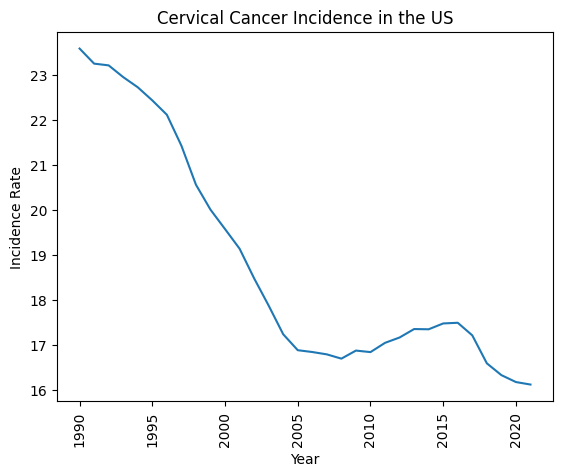

In [ ]:
# OVERALL INCIDENCE RATE IN US (1990 - 2021)
query = "SELECT year, inc_rate FROM us_data ORDER BY year ASC;"
df1 = pd.read_sql(query, con)

plt.title("Cervical Cancer Incidence in the US")
plt.xlabel('Year')
plt.ylabel('Incidence Rate')
plt.plot(df1['year'], df1['inc_rate'])
plt.xticks(rotation='vertical')
plt.show()

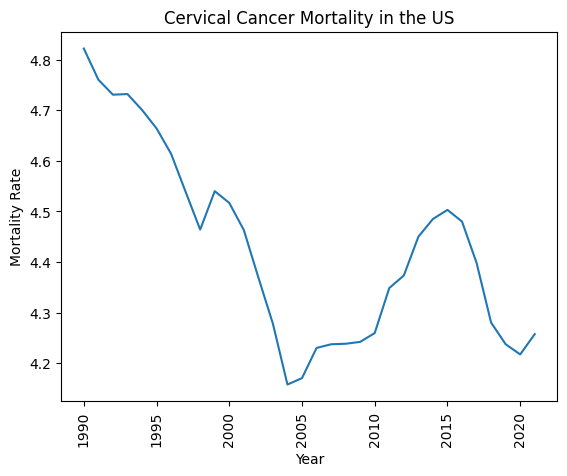

In [ ]:
# OVERALL MORTALITY RATE IN US (1990 - 2021)
query = "SELECT year, mort_rate FROM us_data ORDER BY year ASC;"
df1 = pd.read_sql(query, con)

plt.title("Cervical Cancer Mortality in the US")
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.plot(df1['year'], df1['mort_rate'])
plt.xticks(rotation='vertical')
plt.show()

**Question 2:** *How have US states' cervical cancer rates changed in the past four decades?*

Please enter in a US state (type "quit" to exit): Alabama


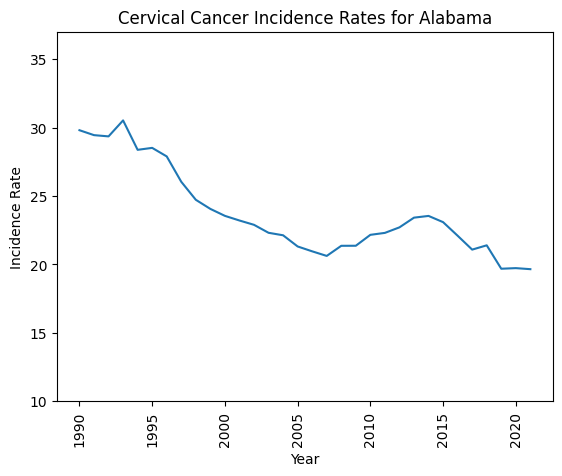

Please enter in a US state (type "quit" to exit): District of Columbia


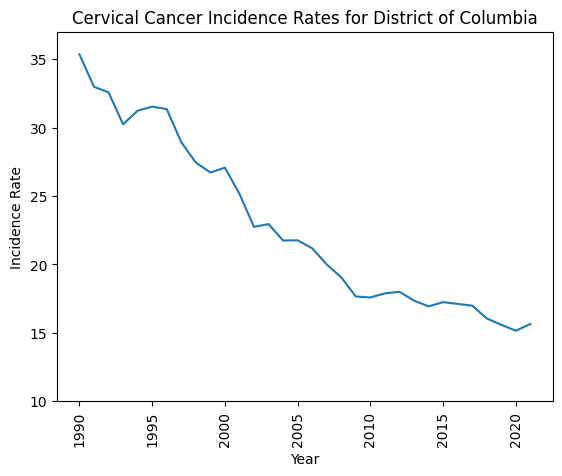

Please enter in a US state (type "quit" to exit): quit


In [ ]:
# STATE INCIDENCE RATES (1990 - 2021)
state = input('Please enter in a US state (type "quit" to exit): ')

while state != "quit":
  query = "SELECT state, year, inc_rate FROM data WHERE state = '" + str(state) + "' ORDER BY year ASC;"
  df2 = pd.read_sql(query, con)

  plt.title("Cervical Cancer Incidence Rates for " + str(state))
  plt.xlabel('Year')
  plt.ylabel('Incidence Rate')
  plt.ylim(10, 37)
  plt.plot(df2['year'], df2['inc_rate'])
  plt.xticks(rotation='vertical')
  plt.show()

  time.sleep(2)

  state = input('Please enter in a US state (type "quit" to exit): ')

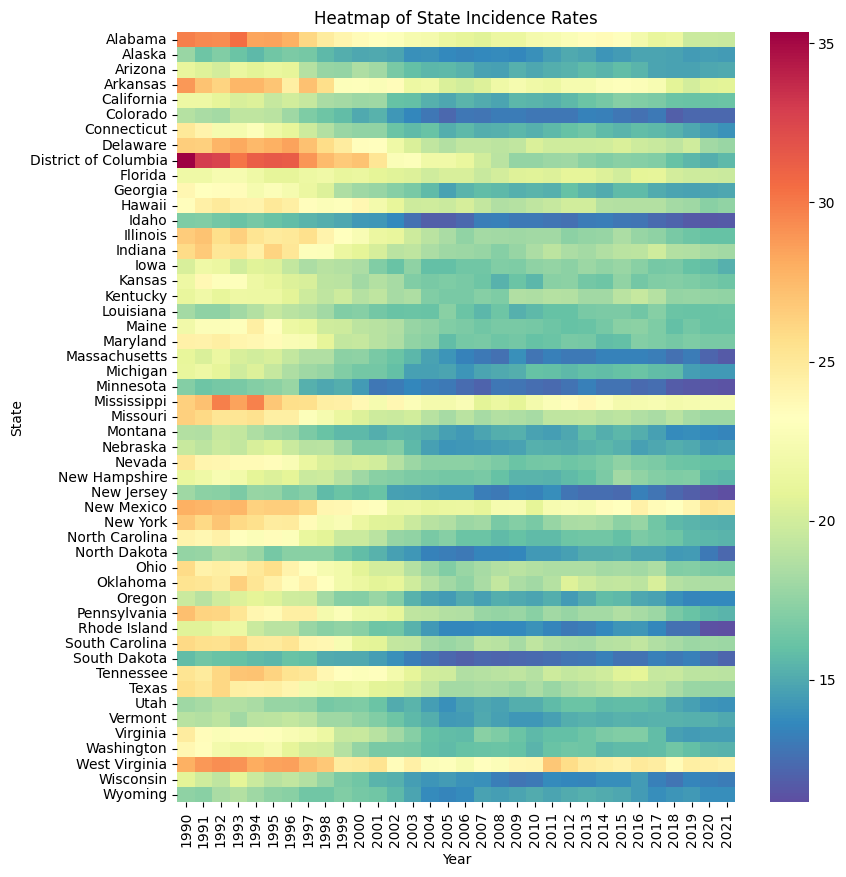

In [ ]:
# HEATMAP OF STATE INCIDENCE RATES (1990 - 2021)
query = "SELECT state, year, inc_rate FROM data ORDER BY year ASC;"
df2 = pd.read_sql(query, con)

plt.figure(figsize=(9, 10))
sns.heatmap(df2.pivot(index='state', columns=['year'], values='inc_rate'), cmap='Spectral_r')
plt.title('Heatmap of State Incidence Rates')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

Please enter in a US state (type "quit" to exit): Alabama


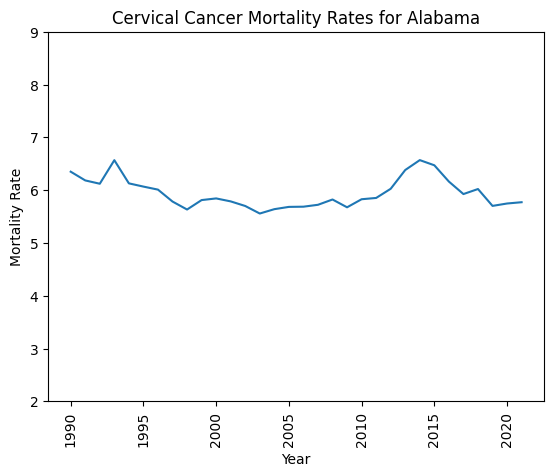

Please enter in a US state (type "quit" to exit): District of Columbia


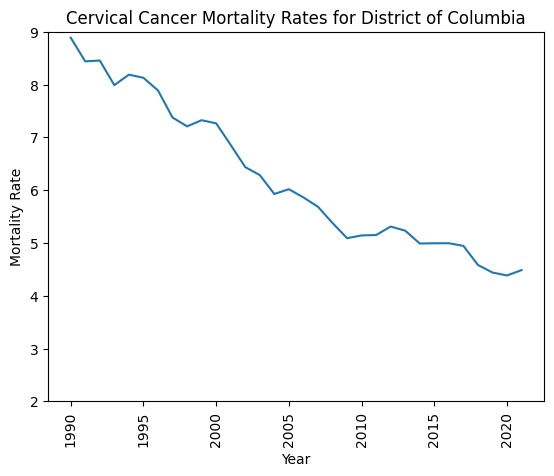

Please enter in a US state (type "quit" to exit): quit


In [ ]:
# STATE MORTALITY RATES (1990 - 2021)
state = input('Please enter in a US state (type "quit" to exit): ')

while state != "quit":
  query = "SELECT state, year, mort_rate FROM data WHERE state = '" + str(state) + "' ORDER BY year ASC;"
  df2 = pd.read_sql(query, con)

  plt.title("Cervical Cancer Mortality Rates for " + str(state))
  plt.xlabel('Year')
  plt.ylabel('Mortality Rate')
  plt.ylim(2, 9)
  plt.plot(df2['year'], df2['mort_rate'])
  plt.xticks(rotation='vertical')
  plt.show()

  time.sleep(2)

  state = input('Please enter in a US state (type "quit" to exit): ')

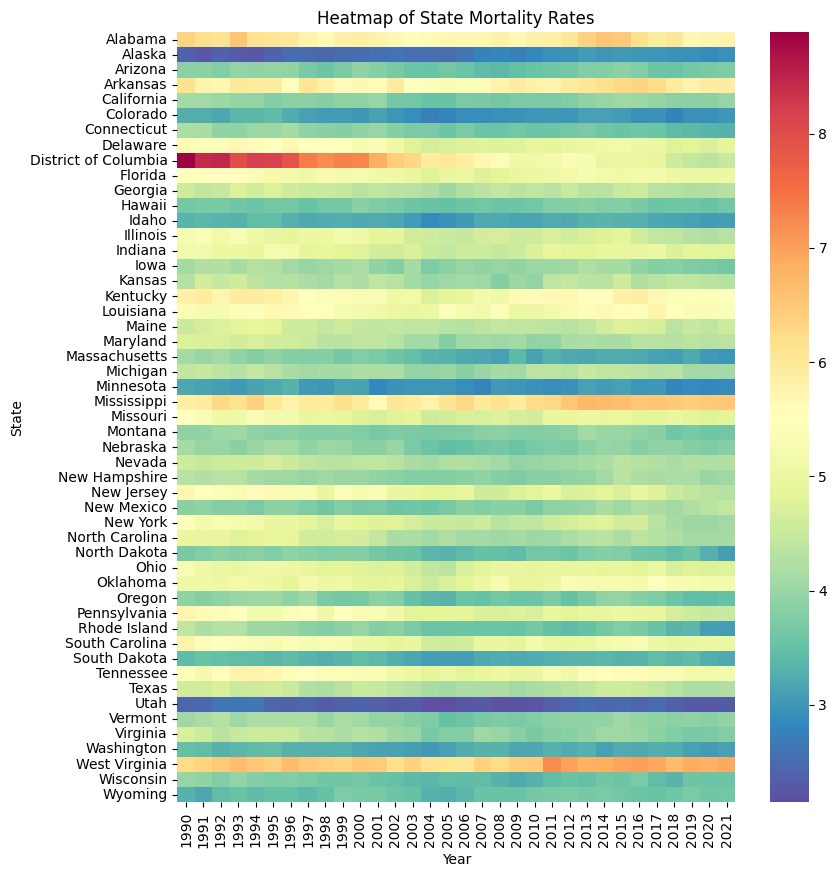

In [ ]:
# HEATMAP OF STATE MORTALITY RATES (1990 - 2021)
query = "SELECT state, year, mort_rate FROM data ORDER BY year ASC;"
df2 = pd.read_sql(query, con)

plt.figure(figsize=(9, 10))
sns.heatmap(df2.pivot(index='state', columns=['year'], values='mort_rate'), cmap='Spectral_r')
plt.title('Heatmap of State Mortality Rates')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

**Question 3:** *Which states have had the highest cervical cancer rates each year?*

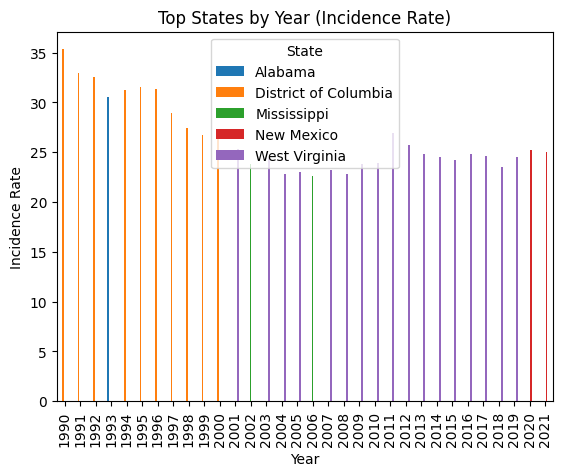

In [ ]:
# HIGHEST INCIDENCE RATE BY YEAR (1990 - 2021)
query = "SELECT state, year, inc_rate FROM data GROUP BY year, state ORDER BY state DESC;"
df3 = pd.read_sql(query, con)

df3 = df3.loc[df3.groupby('year')["inc_rate"].idxmax()]
pd.pivot_table(df3,
               values="inc_rate",
               index="year",
               columns="state",
               aggfunc=sum).plot.bar()
plt.title("Top States by Year (Incidence Rate)")
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.legend(title='State')
plt.show()

<Figure size 640x480 with 0 Axes>

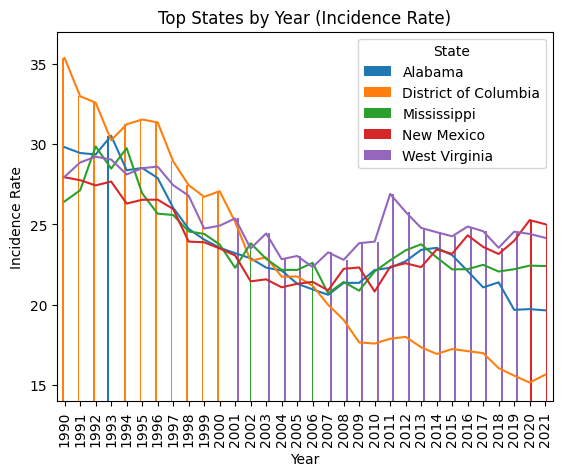

In [ ]:
# HIGHEST INCIDENCE RATE BY YEAR (1990 - 2021)

# Code sourced from https://www.tutorialspoint.com/how-to-show-a-bar-and-line-graph-on-the-same-plot-in-matplotlib
fig, ax = plt.subplots()
plt.clf()

pd.pivot_table(df3,
               values="inc_rate",
               index="year",
               columns="state",
               aggfunc=sum).plot.bar()
plt.title("Top States by Year (Incidence Rate)")
plt.xlabel("Year")
plt.ylabel("Incidence Rate")
plt.ylim(14, 37)

for state in ['Alabama', 'District of Columbia', 'Mississippi', 'New Mexico', 'West Virginia']:
  query = "SELECT state, year, inc_rate FROM data WHERE state = '" + str(state) + "' ORDER BY year ASC;"
  df3 = pd.read_sql(query, con)
  # Code sourced from https://stackoverflow.com/questions/24680981/show-only-certain-items-in-legend
  df3['inc_rate'].plot(kind='line', label='_nolegend_')

plt.xticks(rotation='vertical')
plt.legend(title='State')
plt.show()

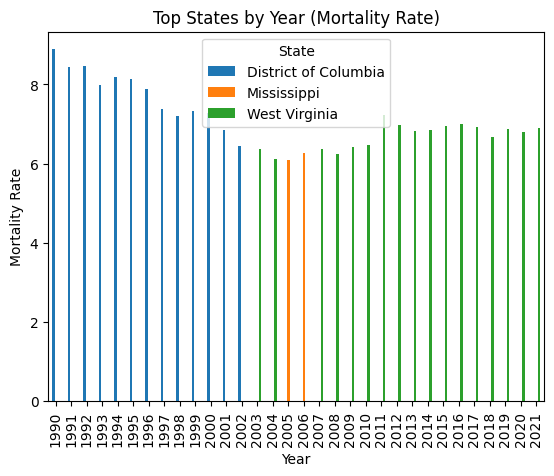

In [5]:
# HIGHEST MORTALITY RATE BY YEAR (1990 - 2021)
query = "SELECT state, year, mort_rate FROM data GROUP BY year, state ORDER BY state DESC;"
df3 = pd.read_sql(query, con)

df3 = df3.loc[df3.groupby('year')["mort_rate"].idxmax()]
pd.pivot_table(df3,
               values="mort_rate",
               index="year",
               columns="state",
               aggfunc=sum).plot.bar()

plt.title("Top States by Year (Mortality Rate)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.legend(title='State')
plt.show()

<Figure size 640x480 with 0 Axes>

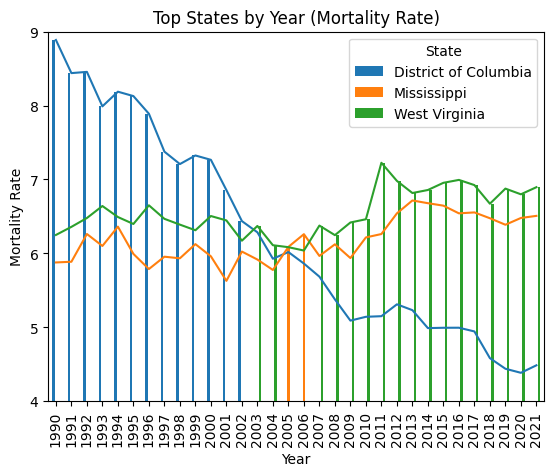

In [6]:
# HIGHEST MORTALITY RATE BY YEAR (1990 - 2021)

# Code sourced from https://www.tutorialspoint.com/how-to-show-a-bar-and-line-graph-on-the-same-plot-in-matplotlib
fig, ax = plt.subplots()
plt.clf()

pd.pivot_table(df3,
               values="mort_rate",
               index="year",
               columns="state",
               aggfunc=sum).plot.bar()
plt.title("Top States by Year (Mortality Rate)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.ylim(4, 9)

for state in ['District of Columbia', 'Mississippi', 'West Virginia']:
  query = "SELECT state, year, mort_rate FROM data WHERE state = '" + str(state) + "' ORDER BY year ASC;"
  df3 = pd.read_sql(query, con)
  # Code sourced from https://stackoverflow.com/questions/24680981/show-only-certain-items-in-legend
  df3['mort_rate'].plot(kind='line', label='_nolegend_')

plt.xticks(rotation='vertical')
plt.legend(title='State')
plt.show()

### Effects of Pap Smear Tests

**Question 4:** *Which states had the highest/lowest cervical cancer rates in 2014 and 2016?*

In [ ]:
# HIGHEST/LOWEST RATES IN 2014
query = "SELECT state, year, inc_rate FROM data WHERE year = 2014 ORDER BY inc_rate ASC;"
df4 = pd.read_sql(query, con)

print("Highest/Lowest Incidence Rate (2014)")
print(df4.iloc[[0, -1]])
print()

query = "SELECT state, year, mort_rate FROM data WHERE year = 2014 ORDER BY mort_rate ASC;"
df4 = pd.read_sql(query, con)

print("Highest/Lowest Mortality Rate (2014)")
print(df4.iloc[[0, -1]])

Highest/Lowest Incidence Rate (2014)
            state  year   inc_rate
0      New Jersey  2014  12.516682
50  West Virginia  2014  24.516799

Highest/Lowest Mortality Rate (2014)
            state  year  mort_rate
0            Utah  2014    2.46254
50  West Virginia  2014    6.85755


In [ ]:
# HIGHEST/LOWEST RATES IN 2016
query = "SELECT state, year, inc_rate FROM data WHERE year = 2016 ORDER BY inc_rate ASC;"
df4 = pd.read_sql(query, con)

print("Highest/Lowest Incidence Rate (2016)")
print(df4.iloc[[0, -1]])
print()

query = "SELECT state, year, mort_rate FROM data WHERE year = 2016 ORDER BY mort_rate ASC;"
df4 = pd.read_sql(query, con)

print("Highest/Lowest Mortality Rate (2016)")
print(df4.iloc[[0, -1]])

Highest/Lowest Incidence Rate (2016)
            state  year   inc_rate
0       Minnesota  2016  12.317514
50  West Virginia  2016  24.871525

Highest/Lowest Mortality Rate (2016)
            state  year  mort_rate
0            Utah  2016   2.432594
50  West Virginia  2016   6.993986


**Question 5:** *How did states' Pap smear screening rates change between 2014 and 2016?*

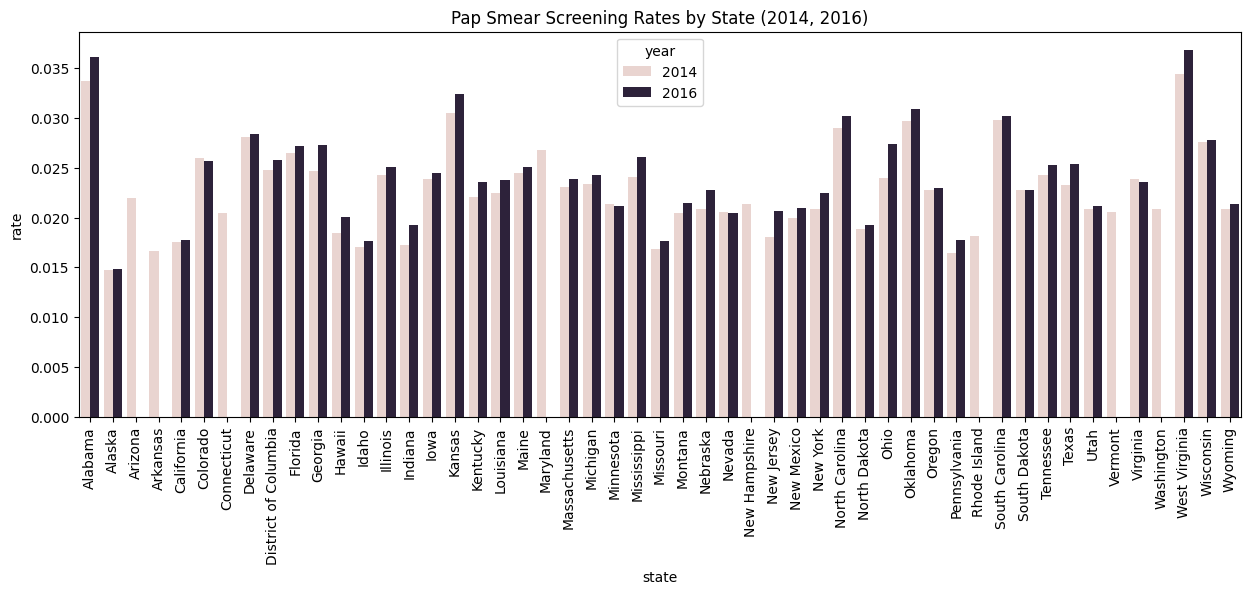

In [ ]:
# STATE PAP SMEAR SCREENING RATES (2014, 2016)
query = "SELECT state, city, year, (val / pop_2010) AS rate FROM pap GROUP BY year, state ORDER BY AVG(rate) ASC"
df5 = pd.read_sql_query(query, con)

plt.figure(figsize=(15, 5))
plt.title("Pap Smear Screening Rates by State (2014, 2016)")
sns.barplot(df5.sort_values('state'), x="state", y="rate", hue="year", legend=True)
plt.xticks(rotation='vertical')
plt.show()

**Question 6:** *What is the correlation between Pap smear screening rates and cervical cancer rates?*

Correlation:  0.3806362226973751


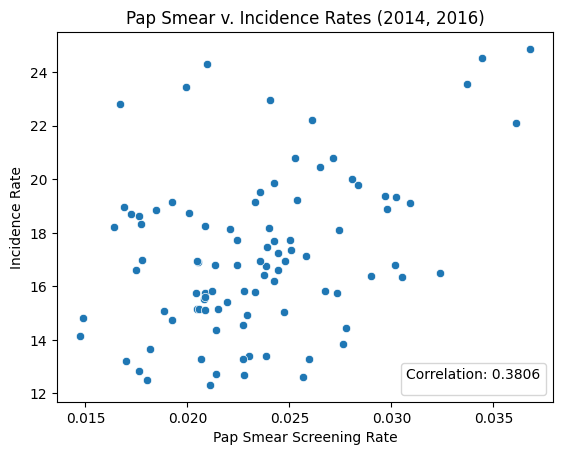

In [ ]:
# CORRELATION BETWEEN PAP SMEARS AND INCIDENCE RATES
query = """
        SELECT p.state, p.city, p.year, d.inc_rate, (p.val / p.pop_2010) AS pap_rate
        FROM pap p
        JOIN data d ON p.state = d.state AND p.year = d.year
        GROUP BY p.year, p.state
        ORDER BY AVG(pap_rate) ASC
        """
df6 = pd.read_sql_query(query, con)

plt.title("Pap Smear v. Incidence Rates (2014, 2016)")
plt.xlabel('Pap Smear Screening Rate')
plt.ylabel('Incidence Rate')
sns.scatterplot(data=df6, x="pap_rate", y="inc_rate")
plt.legend(title="Correlation: " + str(round(df6[['pap_rate', 'inc_rate']].corr()['pap_rate'][1], 4)))
print('Correlation: ', df6[['pap_rate', 'inc_rate']].corr()['pap_rate'][1])

Correlation:  0.4694953673794388


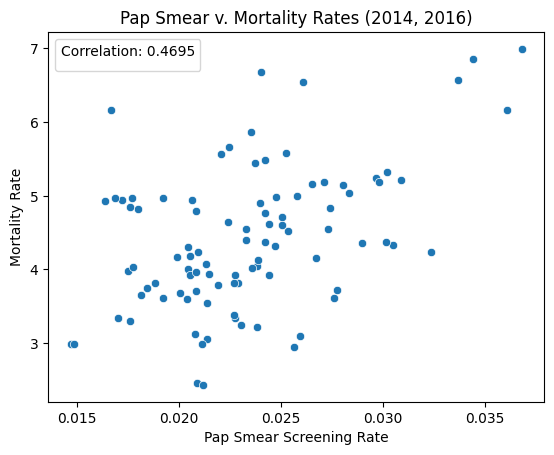

In [ ]:
# CORRELATION BETWEEN PAP SMEARS AND MORTALITY RATES
query = """
        SELECT p.state, p.city, p.year, d.mort_rate, (p.val / p.pop_2010) AS pap_rate
        FROM pap p
        JOIN data d ON p.state = d.state AND p.year = d.year
        GROUP BY p.year, p.state
        ORDER BY AVG(pap_rate) ASC
        """
df6 = pd.read_sql_query(query, con)

plt.title("Pap Smear v. Mortality Rates (2014, 2016)")
plt.xlabel('Pap Smear Screening Rate')
plt.ylabel('Mortality Rate')
sns.scatterplot(data=df6, x="pap_rate", y="mort_rate")
plt.legend(title="Correlation: " + str(round(df6[['pap_rate', 'mort_rate']].corr()['pap_rate'][1], 4)))
print('Correlation: ', df6[['pap_rate', 'mort_rate']].corr()['pap_rate'][1])

### Effects of HPV Vaccinations

**Question 7:** *How have HPV vaccination rates changed in the United States in the past decade?*

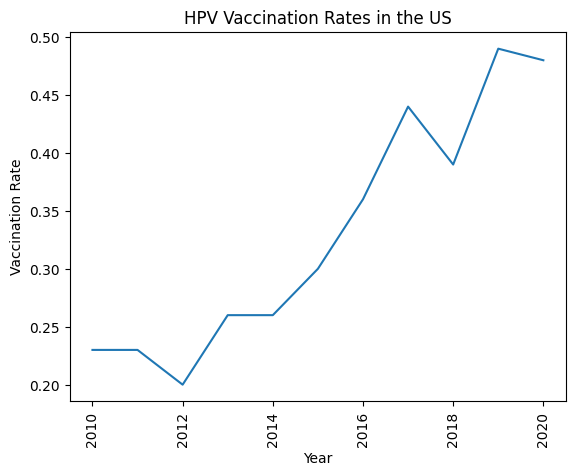

In [ ]:
# HPV VACCINATION RATES IN US (2010 - 2020)
query = "SELECT year, current_cov FROM hpv ORDER BY year ASC"
df7 = pd.read_sql_query(query, con)

plt.title("HPV Vaccination Rates in the US")
plt.xlabel('Year')
plt.ylabel('Vaccination Rate')
plt.plot(df7['year'], df7['current_cov'])
plt.xticks(rotation='vertical')
plt.show()

**Question 8:** *How many cervical cancer cases/deaths/costs would have been prevented in the past decade under a projected 90% vaccination rate?*

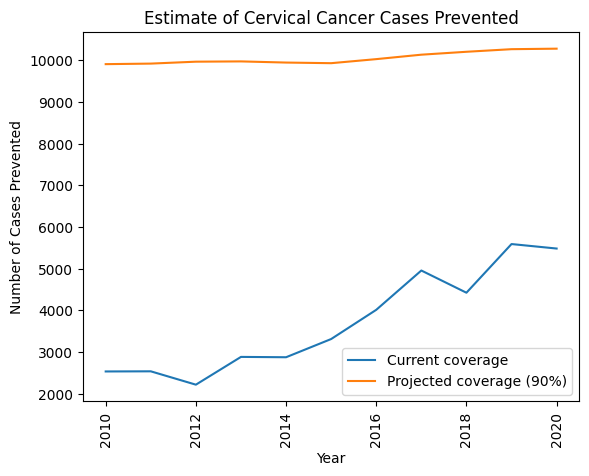

In [ ]:
# CASES PREVENTED IN THE US (2010 - 2020)
query = "SELECT year, curr_cc_prev, proj_cc_prev FROM hpv ORDER BY year ASC"
df8 = pd.read_sql_query(query, con)

plt.title("Estimate of Cervical Cancer Cases Prevented")
plt.xlabel('Year')
plt.ylabel('Number of Cases Prevented')
plt.plot(df8['year'], df8['curr_cc_prev'], label="Current coverage")
plt.plot(df8['year'], df8['proj_cc_prev'], label="Projected coverage (90%)")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

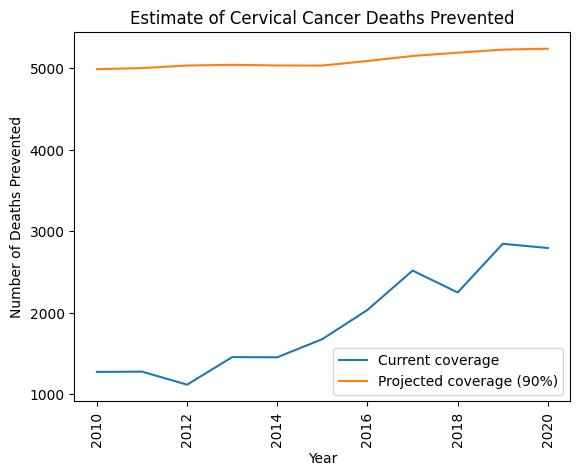

In [ ]:
# DEATHS PREVENTED IN THE US (2010 - 2020)
query = "SELECT year, curr_mort_prev, proj_mort_prev FROM hpv ORDER BY year ASC"
df8 = pd.read_sql_query(query, con)

plt.title("Estimate of Cervical Cancer Deaths Prevented")
plt.xlabel('Year')
plt.ylabel('Number of Deaths Prevented')
plt.plot(df8['year'], df8['curr_mort_prev'], label="Current coverage")
plt.plot(df8['year'], df8['proj_mort_prev'], label="Projected coverage (90%)")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

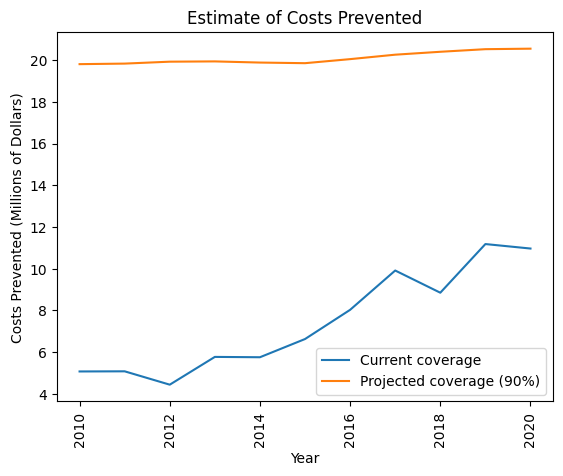

In [ ]:
# COSTS PREVENTED IN THE US (2010 - 2020)
query = "SELECT year, (curr_cost_prev / 1000000) AS curr_cost_prev, (proj_cost_prev / 1000000) AS proj_cost_prev FROM hpv ORDER BY year ASC"
df8 = pd.read_sql_query(query, con)

plt.title("Estimate of Costs Prevented")
plt.xlabel('Year')
plt.ylabel('Costs Prevented (Millions of Dollars)')
plt.plot(df8['year'], df8['curr_cost_prev'], label="Current coverage")
plt.plot(df8['year'], df8['proj_cost_prev'], label="Projected coverage (90%)")
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

**Question 9:** *How have states' teen HPV vaccination rates changed in the past decade?*

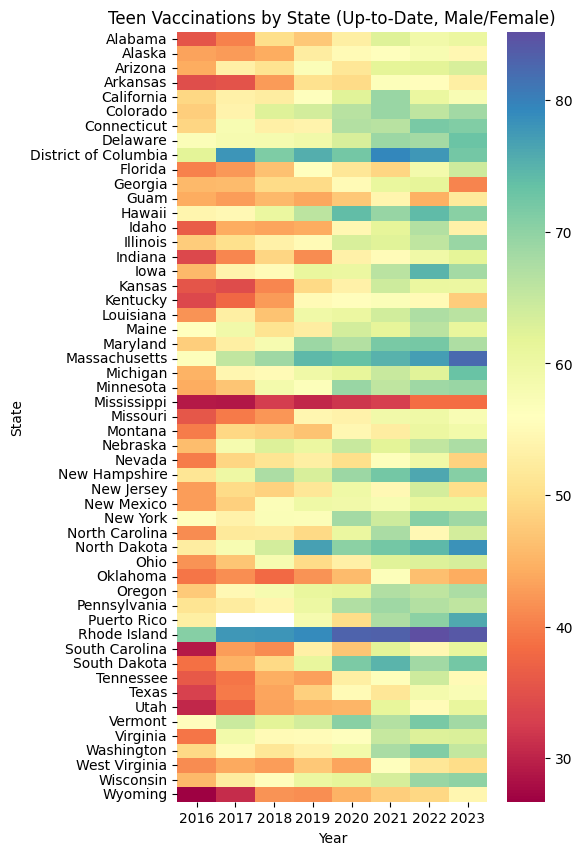

In [ ]:
# STATE TEEN VACCINATIONS (2016 - 2023)
query = "SELECT state, year, val FROM adolescent WHERE dose = 'Up-to-Date, Males and Females' ORDER BY year, state ASC"
df9 = pd.read_sql_query(query, con)

plt.figure(figsize=(5, 10))
plt.title("Teen Vaccinations by State (Up-to-Date, Male/Female)")

# Code sourced from https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbar
sns.heatmap(df9.pivot(index='state', columns=['year'], values='val'), cmap='Spectral')

plt.xlabel('Year')
plt.ylabel('State')
plt.show()

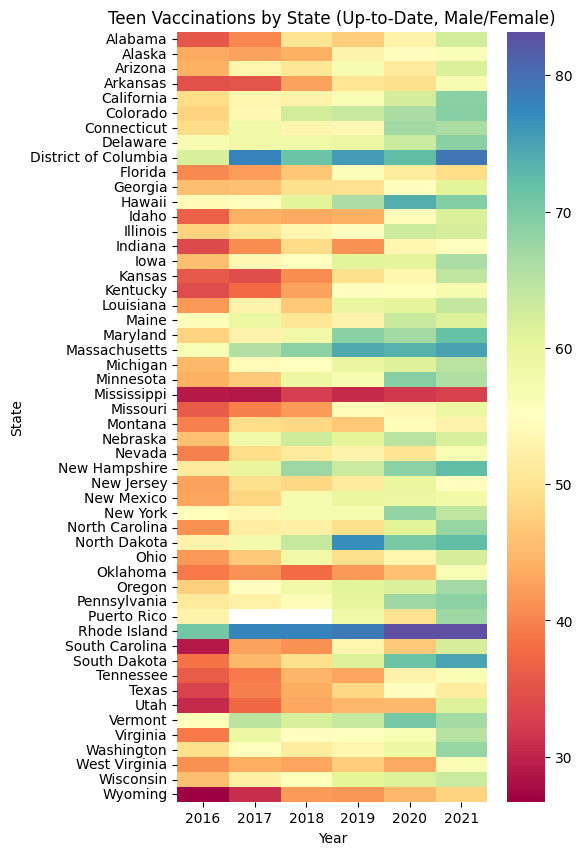

In [ ]:
# STATE TEEN VACCINATIONS (2016 - 2021)
query = "SELECT state, year, val FROM adolescent WHERE dose = 'Up-to-Date, Males and Females' AND year <= 2021 AND state != 'Guam' ORDER BY year, state ASC"
df9 = pd.read_sql_query(query, con)

plt.figure(figsize=(5, 10))
plt.title("Teen Vaccinations by State (Up-to-Date, Male/Female)")
sns.heatmap(df9.pivot(index='state', columns=['year'], values='val'), cmap='Spectral')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

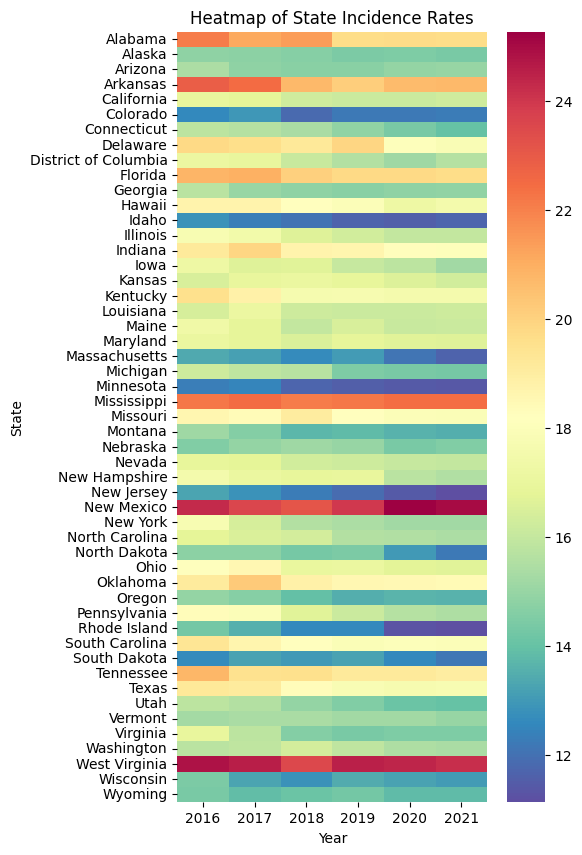

In [ ]:
# COMPARING WITH STATE INCIDENCE RATES (2016 - 2021)
query = "SELECT state, year, inc_rate FROM data WHERE year >= 2016 ORDER BY year ASC;"
df2 = pd.read_sql(query, con)

plt.figure(figsize=(5, 10))
sns.heatmap(df2.pivot(index='state', columns=['year'], values='inc_rate'), cmap='Spectral_r')
plt.title('Heatmap of State Incidence Rates')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

**Question 10:** *What is the correlation between teen HPV vaccination rates and cervical cancer rates?*

Correlation:  -0.41426569194144175


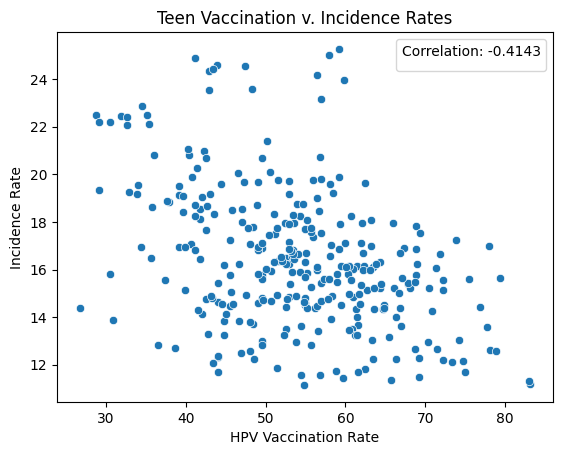

In [ ]:
# CORRELATION BETWEEN TEEN VACCINATIONS AND INCIDENCE RATES (2016 - 2021)
query = """
        SELECT a.state, a.year, d.inc_rate, a.val
        FROM adolescent a
        JOIN data d ON a.state = d.state AND a.year = d.year
        WHERE a.dose = "Up-to-Date, Males and Females"
        """
df10 = pd.read_sql_query(query, con)

plt.title("Teen Vaccination v. Incidence Rates")
plt.xlabel('HPV Vaccination Rate')
plt.ylabel('Incidence Rate')
sns.scatterplot(data=df10, x="val", y="inc_rate")
plt.legend(title="Correlation: " + str(round(df10[['val', 'inc_rate']].corr()['val'][1], 4)))
print('Correlation: ', df10[['val', 'inc_rate']].corr()['val'][1])

Correlation:  -0.37472825658574016


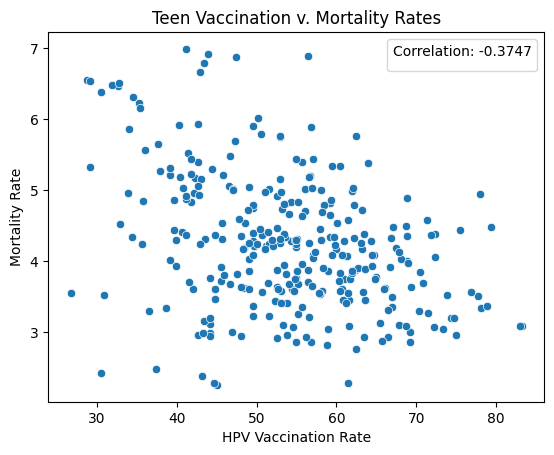

In [ ]:
# CORRELATION BETWEEN TEEN VACCINATIONS AND MORTALITY RATES (2016 - 2021)
query = """
        SELECT a.state, a.year, d.mort_rate, a.val
        FROM adolescent a
        JOIN data d ON a.state = d.state AND a.year = d.year
        WHERE a.dose = "Up-to-Date, Males and Females"
        """
df10 = pd.read_sql_query(query, con)

plt.title("Teen Vaccination v. Mortality Rates")
plt.xlabel('HPV Vaccination Rate')
plt.ylabel('Mortality Rate')
sns.scatterplot(data=df10, x="val", y="mort_rate")
plt.legend(title="Correlation: " + str(round(df10[['val', 'mort_rate']].corr()['val'][1], 4)))
print('Correlation: ', df10[['val', 'mort_rate']].corr()['val'][1])

**Question 11:** *What are the effects of insurance coverage or other demographic/economic factors on teen HPV vaccinations?*

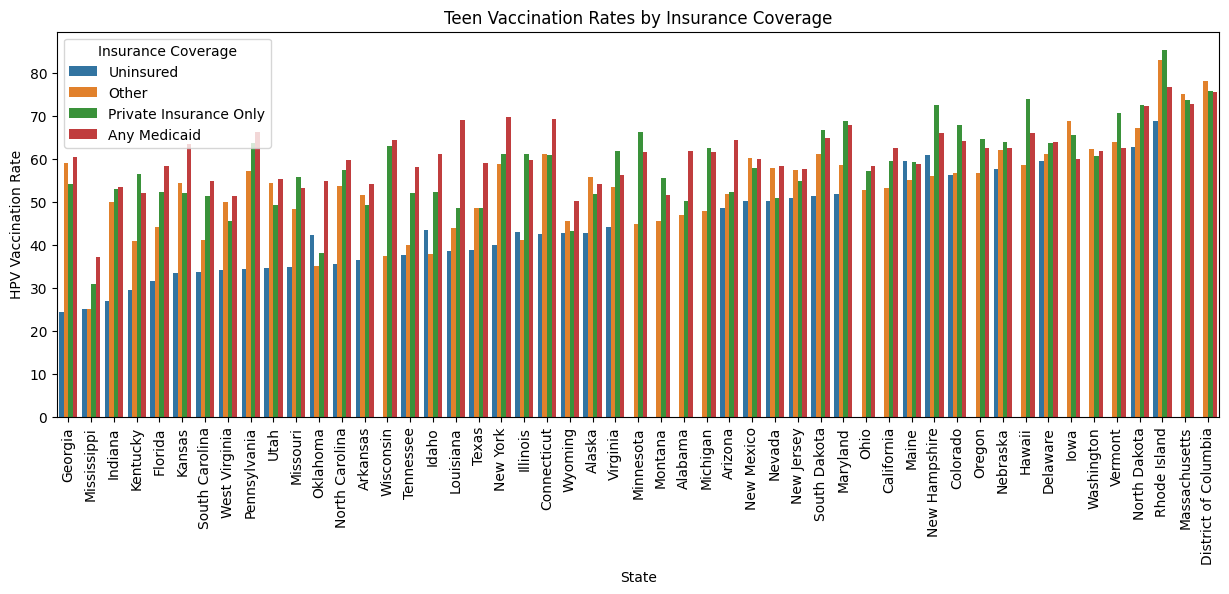

In [ ]:
# EFFECTS OF INSURANCE COVERAGE (2018 - 2022)
query = "SELECT state, dimension_val, val FROM demo WHERE dimension_type = 'Insurance Coverage'"
df11 = pd.read_sql_query(query, con)

plt.figure(figsize=(15, 5))
plt.title("Teen Vaccination Rates by Insurance Coverage")
plt.xlabel('State')
plt.ylabel('HPV Vaccination Rate')
sns.barplot(df11.sort_values('val'), x="state", y="val", hue="dimension_val", legend=True)
plt.xticks(rotation='vertical')
plt.legend(title='Insurance Coverage')
plt.show()

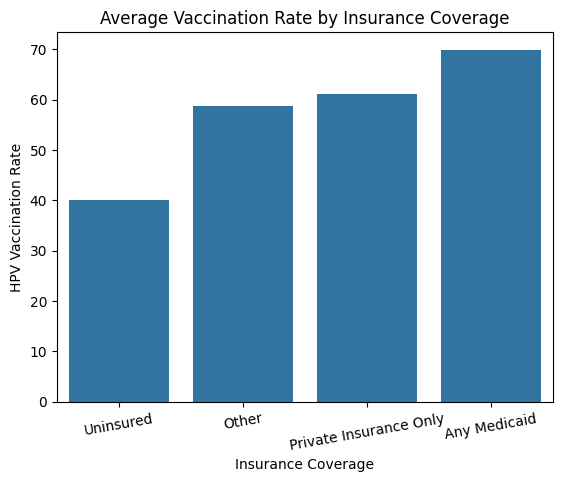

In [ ]:
# AVERAGE EFFECTS BY INSURANCE COVERAGE (2018 - 2022)
query = "SELECT state, dimension_val, val FROM demo WHERE dimension_type = 'Insurance Coverage' GROUP BY dimension_val ORDER BY AVG(val)"
df11 = pd.read_sql_query(query, con)

plt.title("Average Vaccination Rate by Insurance Coverage")
plt.xlabel('Insurance Coverage')
plt.ylabel('HPV Vaccination Rate')
plt.xticks(rotation=10)
sns.barplot(df11.sort_values('val'), x="dimension_val", y="val", legend=True)
plt.show()

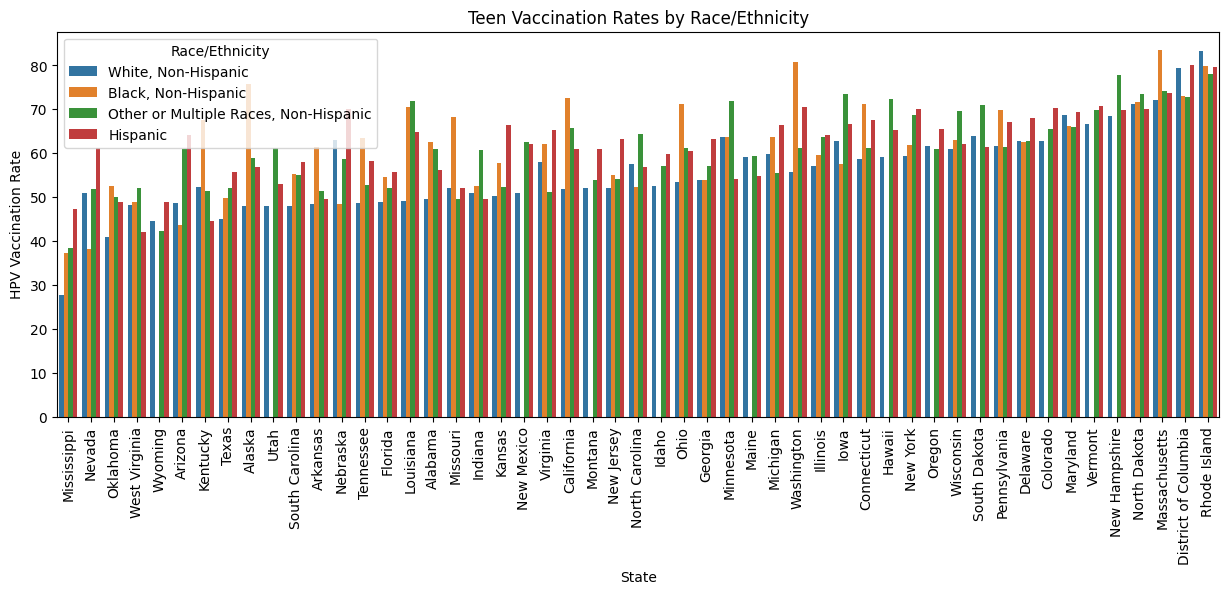

In [ ]:
# EFFECTS OF RACE/ETHNICITY (2018 - 2022)
query = "SELECT state, dimension_val, val FROM demo WHERE dimension_type = 'Race and Ethnicity'"
df11 = pd.read_sql_query(query, con)

plt.figure(figsize=(15, 5))
plt.title("Teen Vaccination Rates by Race/Ethnicity")
plt.xlabel('State')
plt.ylabel('HPV Vaccination Rate')
sns.barplot(df11.sort_values('val'), x="state", y="val", hue="dimension_val", legend=True)
plt.legend(title='Race/Ethnicity')
plt.xticks(rotation='vertical')
plt.show()

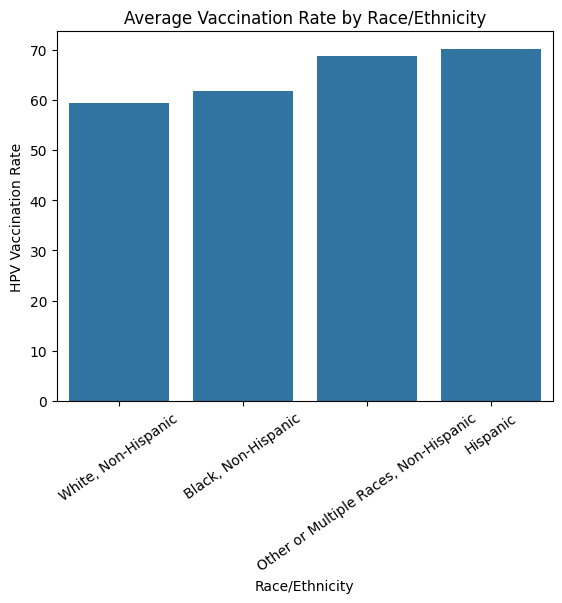

In [ ]:
# AVERAGE EFFECTS BY RACE/ETHNICITY (2018 - 2022)
query = "SELECT state, dimension_val, val FROM demo WHERE dimension_type = 'Race and Ethnicity' GROUP BY dimension_val ORDER BY AVG(val)"
df11 = pd.read_sql_query(query, con)

plt.title("Average Vaccination Rate by Race/Ethnicity")
plt.xlabel('Race/Ethnicity')
plt.ylabel('HPV Vaccination Rate')
plt.xticks(rotation=35)
sns.barplot(df11.sort_values('val'), x="dimension_val", y="val", legend=True)
plt.show()

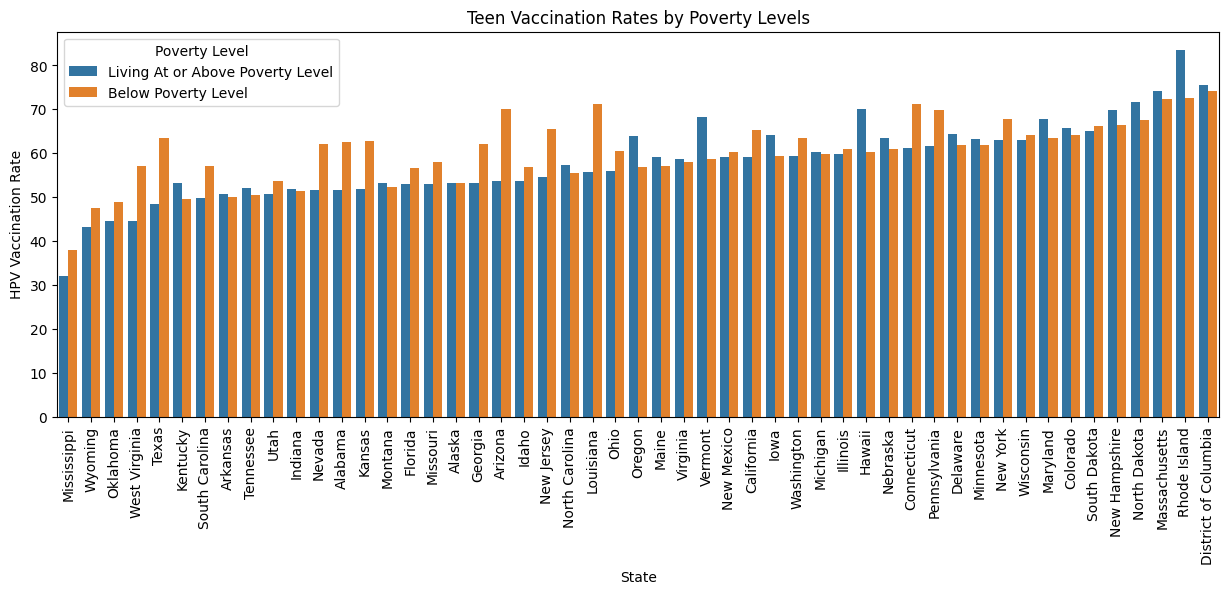

In [ ]:
# EFFECTS OF POVERTY (2018 - 2022)
query = "SELECT state, dimension_val, val FROM demo WHERE dimension_type = 'Poverty'"
df11 = pd.read_sql_query(query, con)

plt.figure(figsize=(15, 5))
plt.title("Teen Vaccination Rates by Poverty Levels")
plt.xlabel('State')
plt.ylabel('HPV Vaccination Rate')
sns.barplot(df11.sort_values('val'), x="state", y="val", hue="dimension_val", legend=True)
plt.legend(title='Poverty Level')
plt.xticks(rotation='vertical')
plt.show()

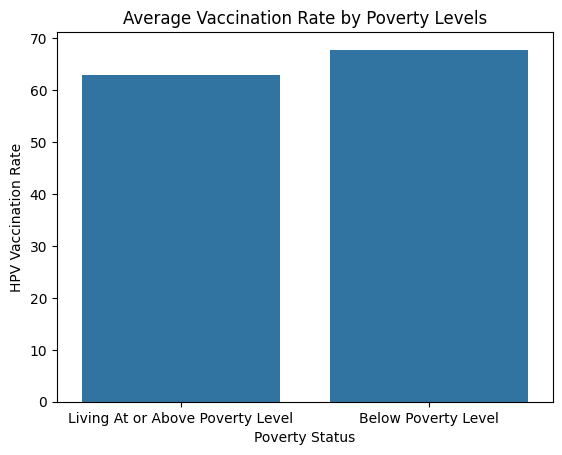

In [ ]:
# AVERAGE EFFECTS BY POVERTY (2018 - 2022)
query = "SELECT state, dimension_val, val FROM demo WHERE dimension_type = 'Poverty' GROUP BY dimension_val ORDER BY AVG(val)"
df11 = pd.read_sql_query(query, con)

plt.title("Average Vaccination Rate by Poverty Levels")
plt.xlabel('Poverty Status')
plt.ylabel('HPV Vaccination Rate')
sns.barplot(df11.sort_values('val'), x="dimension_val", y="val", legend=True)
plt.show()

In [ ]:
# CLOSING CONNECTION TO DATABASE
con.close()

This concludes the analytic/exploratory section of my project! The conclusions I drew from this analysis are summarized in `First Semester Project: Project Report (5)`.